<a href="https://colab.research.google.com/github/Dhiraj73Ray/College_Management_App/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



Data Collection/Loading and Proccessing

In [363]:
data = pd.read_csv('/content/Titanic-Dataset.csv')

In [364]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [365]:
data.shape

(891, 12)

In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [367]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [368]:
# remove missing null values Column: Cabin
data = data.drop(columns = 'Cabin', axis =1)

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [370]:
# Replacing missing Values with mean number
data['Age'].fillna(data['Age'].mean(), inplace = True)


In [371]:
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [372]:
print(data['Embarked'].mode()[0])

S


In [373]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [374]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Analysing Data

In [375]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [376]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


Visualization

In [377]:
sns.set(style='whitegrid', context='notebook', palette='deep')

<Axes: xlabel='Survived', ylabel='count'>

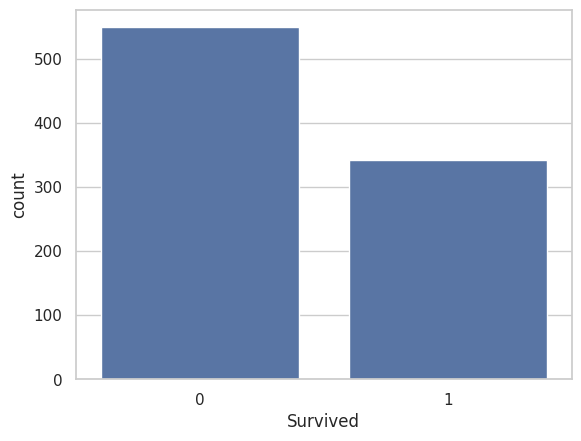

In [378]:
sns.countplot(x='Survived', data=data)

In [379]:
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

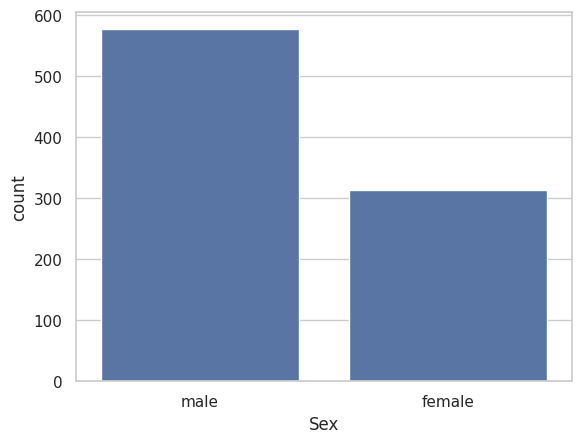

In [380]:
#Count plot for "Sex" Column
sns.countplot(x ='Sex', data = data)

<Axes: xlabel='Sex', ylabel='count'>

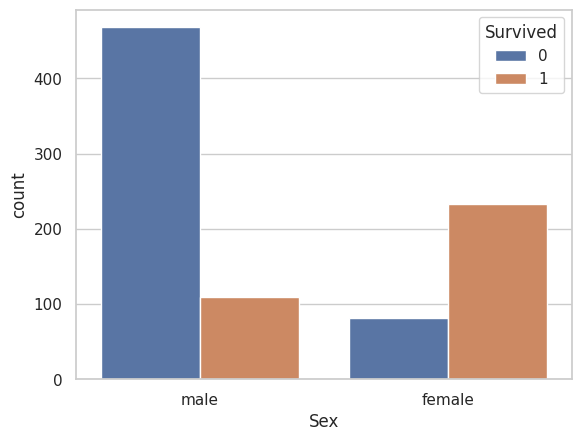

In [381]:
sns.countplot(x = data['Sex'], hue = data['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

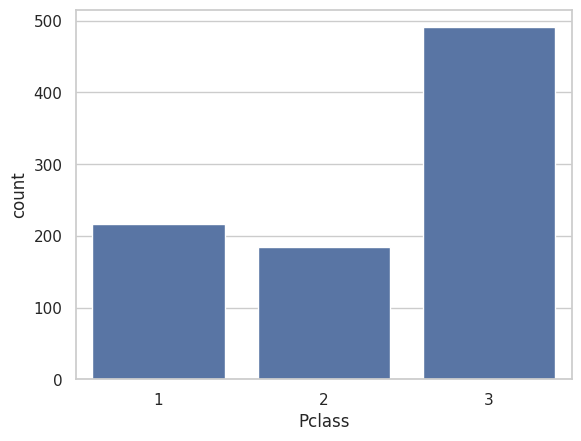

In [382]:
sns.countplot(x = 'Pclass', data = data)

<Axes: xlabel='Pclass', ylabel='count'>

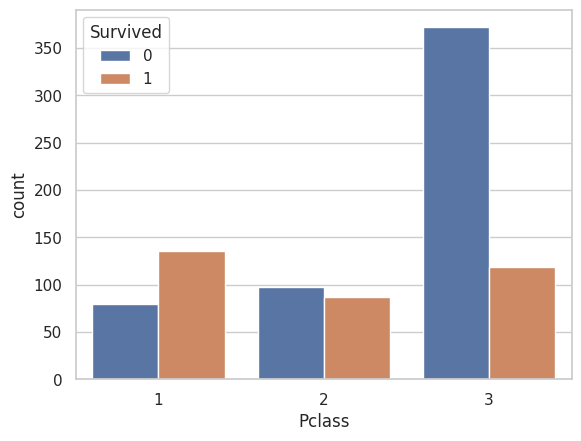

In [383]:
sns.countplot(x = data['Pclass'], hue = data['Survived'])

In [384]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [385]:
data.Sex.value_counts()

,count
Sex,
male,577
female,314


In [386]:
data.Embarked.value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [387]:
# data  = pd.get_dummies(data, columns = ['Sex', 'Embarked'])
data = data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}})

In [388]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [389]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object


In [390]:
# print(data['Embarked_C'].value_counts())
# print(data['Embarked_Q'].value_counts())
# print(data['Embarked_S'].value_counts())


In [391]:
data['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [392]:
data.Embarked.value_counts()


,count
Embarked,
0,646
1,168
2,77


In [393]:
X = data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
Y = data['Survived']

In [394]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [395]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [396]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [397]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [398]:
print(Y.shape, Y_train.shape, Y_test.shape)

(891,) (712,) (179,)


In [399]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [400]:
X_train_pred = model.predict(X_train)
print(X_train_pred)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

In [401]:
train_data_accuracy = accuracy_score(Y_train, X_train_pred)
print(train_data_accuracy)

0.8019662921348315


In [402]:
X_test_pred = model.predict(X_test)
print(X_test_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [403]:
test_data_accuracy = accuracy_score(Y_test, X_test_pred)
print(test_data_accuracy)

0.7988826815642458


In [404]:
import pickle
import joblib
# pickle.dump(model, open('model.pkl', 'wb'))
# joblib.dump(model, 'Titanic_Prediction_model.pkl')

In [405]:
# Make predictions
Y_pred = model.predict(X_test)

In [406]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

In [407]:
# X.head(50)

In [408]:
# Y.head(50)

In [409]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7988826815642458
Confusion Matrix:
[[89 16]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [410]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, Y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [0.79329609 0.78651685 0.79213483 0.76966292 0.8258427 ]
Mean CV Score: 0.7934906785512522


In [411]:
importances = model.coef_[0]
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

    Feature  Importance
1       Sex    2.580336
6  Embarked    0.234269
5      Fare    0.002819
2       Age   -0.031962
4     Parch   -0.103620
3     SibSp   -0.304664
0    Pclass   -0.960807


In [412]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [413]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[2,0,43,455,0,0,3]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

So Sorry! Not Survived


In [414]:
# # !pip install pyngrok

# from pyngrok import ngrok
# import subprocess
# import os


# #Setup ngrok with authtoken

# ngrok.set_auth_token("2kC24GAfCP1jIQtfuP8hRjLWZkf_7PqrmDRGjAeg52NiVn685")

# #Running Flask app
# # os.system('pip install flask')
# os.system("nohup python -m flask run --no-reload &")

# #open ngrok tunnel tothe flaskapp using http protocol
# proc = subprocess.Popen(["ngrok", "http", "5000"])

# #Retrive ngrok's public url here
# public_url = ngrok.connect(addr ="5000", proto="http")
# print(public_url)


In [415]:
# from flask import Flask, request, jsonify
# import joblib
# from pyngrok import ngrok
# from IPython.display import display, HTML

# # Load the trained model
# model = joblib.load('Titanic_Prediction_model.pkl')

# app = Flask(__name__)

# @app.route('/')
# def home():
#     # HTML form to take inputs
#     html_form = """
#     <!DOCTYPE html>
# <html lang="en">
# <head>
#     <meta charset="UTF-8">
#     <meta name="viewport" content="width=device-width, initial-scale=1.0">
#     <title>Titanic Survival Prediction</title>
#     <style>
#         body {
#             background-color: black;
#             color: white;
#             font-family: Arial, sans-serif;
#             text-align: center;
#             padding: 20px;
#         }
#         #predictionForm {
#             display: inline-block;
#             text-align: left;
#         }
#         img {
#             max-width: 100%;
#             height: auto;
#         }
#     </style>
# </head>
# <body>
#     <h2>Titanic Survival Prediction</h2>
#     <form id="predictionForm" method="post" action="/predict">
#         <label for="pclass">Pclass:</label>
#         <input type="text" id="pclass" name="pclass"><br><br>

#         <label for="sex">Sex (0 for male, 1 for female):</label>
#         <input type="text" id="sex" name="sex"><br><br>

#         <label for="age">Age:</label>
#         <input type="text" id="age" name="age"><br><br>

#         <label for="sibsp">SibSp:</label>
#         <input type="text" id="sibsp" name="sibsp"><br><br>

#         <label for="parch">Parch:</label>
#         <input type="text" id="parch" name="parch"><br><br>

#         <label for="fare">Fare:</label>
#         <input type="text" id="fare" name="fare"><br><br>

#         <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
#         <input type="text" id="embarked" name="embarked"><br><br>

#         <button type="button" onclick="predictSurvival()">Predict</button>
#     </form>

#     <p id="predictionResult"></p>

#     <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg" alt="Titanic Image">

#     <script>
#         function predictSurvival() {
#             var xhr = new XMLHttpRequest();
#             var url = "/predict";
#             var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

#             xhr.open("POST", url, true);
#             xhr.onreadystatechange = function () {
#                 if (xhr.readyState === 4 && xhr.status === 200) {
#                     var response = JSON.parse(xhr.responseText);
#                     document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + response.prediction;
#                 }
#             };
#             xhr.send(data);
#         }
#     </script>
# </body>
# </html>

#     """
#     return html_form

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Access form data
#     pclass = request.form['pclass']
#     sex = request.form['sex']
#     age = request.form['age']
#     sibsp = request.form['sibsp']
#     parch = request.form['parch']
#     fare = request.form['fare']
#     embarked = request.form['embarked']

#     # Convert data to appropriate types
#     pclass = int(pclass)
#     sex = int(sex)
#     age = float(age)
#     sibsp = int(sibsp)
#     parch = int(parch)
#     fare = float(fare)
#     embarked = int(embarked)

#     # Make prediction
#     features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
#     prediction = model.predict(features)[0]

#     return jsonify({'prediction': int(prediction)})

# def run_flask_app():
#     # Run Flask app on port 5000
#     app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# # Start ngrok tunnel
# public_url = ngrok.connect(addr="5000", proto="http")
# print("Public URL:", public_url)

# # Display ngrok tunnel URL
# display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

# try:
#     # Keep the Flask app running
#     run_flask_app()
# except KeyboardInterrupt:
#     # Shutdown ngrok and Flask app
#     ngrok.kill()
